In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
with open(r'data/laptop.csv', 'rb') as f:
    result = chardet.detect(f.read()) # or readline if the file is large

F_Laptop_DF=pd.read_csv(r'data/laptop.csv',encoding=result['encoding'])


In [3]:
F_Laptop_DF.dtypes

Brand         object
Product       object
Display       object
RAM           object
DDR/SDR       object
HardDisk      object
Processor     object
OS            object
Pricing        int64
Customer       int64
Rating       float64
dtype: object

In [4]:
F_Laptop_DF.head()

,Brand,Product,Display,RAM,DDR/SDR,HardDisk,Processor,OS,Pricing,Customer,Rating
0,HP,HP 14q APU Dual Core A6 - (4 GB/256 GB SSD/Win...,14,4 GB DDR4,DDR,256 GB SSD,AMD APU Dual Core A6,64 bit Windows 10,19990,694,4.0
1,APPLE,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,13.3,8 GB DDR3,DDR,128 GB SSD,Intel Core i5 (5th Gen),64 bit Mac OS,62990,16733,4.7
2,HP,HP 15s Core i3 8th Gen - (8 GB/1 TB HDD/Window...,15.6,8 GB DDR4,DDR,1 TB HDD,Intel Core i3 (8th Gen),64 bit Windows 10,36990,110,4.4
3,ASUS,Asus APU Dual Core E1 - (4 GB/500 GB HDD/Windo...,15.6,4 GB DDR3,DDR,500 GB HDD,AMD APU Dual Core E1,64 bit Windows 10,17990,1932,3.8
4,LENOVO,Lenovo Ideapad 330 Celeron Dual Core - (4 GB/1...,15.6,4 GB DDR4,DDR,1 TB HDD,Intel Celeron Dual Core,64 bit Windows 10,19990,52,4.2


In [5]:
F_Laptop_DF['Brand']

0          HP
1       APPLE
2          HP
3        ASUS
4      LENOVO
        ...  
456        HP
457      ASUS
458        HP
459      DELL
460      DELL
Name: Brand, Length: 461, dtype: object

In [6]:
list_of_brand = list(F_Laptop_DF['Brand'].apply(lambda x:  x if x != "" else []).values)

In [7]:
list_of_brand

['HP',
 'APPLE',
 'HP',
 'ASUS',
 'LENOVO',
 'HP',
 'DELL',
 'HP',
 'HP',
 'HP',
 'DELL',
 'HP',
 'LENOVO',
 'ACER',
 'IBALL',
 'HP',
 'HP',
 'DELL',
 'LENOVO',
 'ACER',
 'LENOVO',
 'LENOVO',
 'HP',
 'ACER',
 'LENOVO',
 'ASUS',
 'HP',
 'LENOVO',
 'MSI',
 'ASUS',
 'HP',
 'HP',
 'HP',
 'HP',
 'HP',
 'DELL',
 'ASUS',
 'ASUS',
 'ASUS',
 'ASUS',
 'HP',
 'HP',
 'HP',
 'HP',
 'LENOVO',
 'ASUS',
 'HP',
 'APPLE',
 'LENOVO',
 'HP',
 'DELL',
 'LENOVO',
 'MSI',
 'ASUS',
 'ASUS',
 'ASUS',
 'HP',
 'ASUS',
 'ASUS',
 'HP',
 'HP',
 'ASUS',
 'ASUS',
 'HP',
 'ASUS',
 'LENOVO',
 'DELL',
 'HP',
 'DELL',
 'APPLE',
 'HP',
 'HP',
 'AVITA',
 'AVITA',
 'ASUS',
 'HP',
 'LENOVO',
 'HP',
 'HP',
 'HP',
 'HP',
 'ACER',
 'APPLE',
 'LENOVO',
 'LENOVO',
 'APPLE',
 'ASUS',
 'HP',
 'HP',
 'ACER',
 'HP',
 'HP',
 'LENOVO',
 'LENOVO',
 'HP',
 'ACER',
 'ASUS',
 'ASUS',
 'HP',
 'HP',
 'HP',
 'LENOVO',
 'NEXSTGO',
 'APPLE',
 'ASUS',
 'AVITA',
 'HP',
 'ASUS',
 'AVITA',
 'AVITA',
 'HP',
 'LENOVO',
 'LENOVO',
 'ASUS',
 'ASUS',
 '

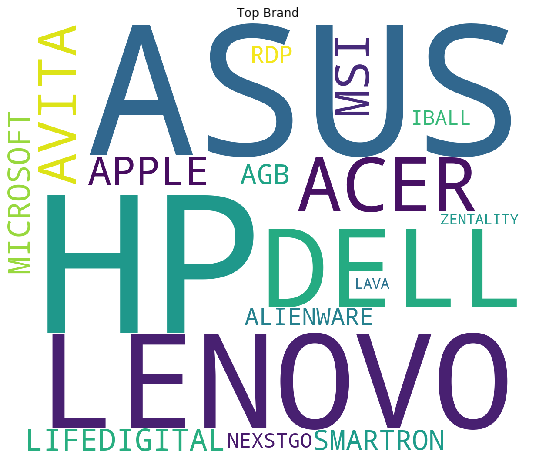

In [8]:

text = ' '.join(list_of_brand)
#wc=WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=None, background_color="white", collocations=False, width=1200, height=1000).generate(text)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.title('Top Brand')
plt.axis("off")
plt.show()

In [9]:
F_Laptop_DF[["Brand", "Product","Customer"]].head()

,Brand,Product,Customer
0,HP,HP 14q APU Dual Core A6 - (4 GB/256 GB SSD/Win...,694
1,APPLE,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,16733
2,HP,HP 15s Core i3 8th Gen - (8 GB/1 TB HDD/Window...,110
3,ASUS,Asus APU Dual Core E1 - (4 GB/500 GB HDD/Windo...,1932
4,LENOVO,Lenovo Ideapad 330 Celeron Dual Core - (4 GB/1...,52


In [10]:
F_Laptop_DF[["Brand", "Product","Pricing"]].head()

,Brand,Product,Pricing
0,HP,HP 14q APU Dual Core A6 - (4 GB/256 GB SSD/Win...,19990
1,APPLE,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,62990
2,HP,HP 15s Core i3 8th Gen - (8 GB/1 TB HDD/Window...,36990
3,ASUS,Asus APU Dual Core E1 - (4 GB/500 GB HDD/Windo...,17990
4,LENOVO,Lenovo Ideapad 330 Celeron Dual Core - (4 GB/1...,19990


In [11]:
laptopByBrand = F_Laptop_DF.groupby("Brand")

In [12]:
laptopByBrand.head()

,Brand,Product,Display,RAM,DDR/SDR,HardDisk,Processor,OS,Pricing,Customer,Rating
0,HP,HP 14q APU Dual Core A6 - (4 GB/256 GB SSD/Win...,14,4 GB DDR4,DDR,256 GB SSD,AMD APU Dual Core A6,64 bit Windows 10,19990,694,4.0
1,APPLE,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,13.3,8 GB DDR3,DDR,128 GB SSD,Intel Core i5 (5th Gen),64 bit Mac OS,62990,16733,4.7
2,HP,HP 15s Core i3 8th Gen - (8 GB/1 TB HDD/Window...,15.6,8 GB DDR4,DDR,1 TB HDD,Intel Core i3 (8th Gen),64 bit Windows 10,36990,110,4.4
3,ASUS,Asus APU Dual Core E1 - (4 GB/500 GB HDD/Windo...,15.6,4 GB DDR3,DDR,500 GB HDD,AMD APU Dual Core E1,64 bit Windows 10,17990,1932,3.8
4,LENOVO,Lenovo Ideapad 330 Celeron Dual Core - (4 GB/1...,15.6,4 GB DDR4,DDR,1 TB HDD,Intel Celeron Dual Core,64 bit Windows 10,19990,52,4.2
5,HP,HP 15q APU Dual Core A9 - (4 GB/1 TB HDD/Windo...,15.6,4 GB DDR4,DDR,1 TB HDD,AMD APU Dual Core A9,64 bit Windows 10,22990,1695,4.0
6,DELL,Dell 14 3000 Core i3 7th Gen - (4 GB/1 TB HDD/...,14,4 GB DDR4,DDR,1 TB HDD,Intel Core i3 (7th Gen),64 bit Windows 10,27990,7,4.3
7,HP,HP Pavilion 15 Core i5 8th Gen - (8 GB/1 TB HD...,15.6,8 GB DDR4,DDR,1 TB HDD,Intel Core i5 (8th Gen),64 bit Windows 10,53990,102,4.4
8,HP,HP 15q Core i5 7th Gen - (8 GB/1 TB HDD/Window...,15.6,8 GB DDR4,DDR,1 TB HDD,Intel Core i5 (7th Gen),64 bit Windows 10,40990,1244,4.1
10,DELL,Dell Vostro 15 Core i3 7th Gen - (4 GB/1 TB HD...,15.6,4 GB DDR4,DDR,1 TB HDD,Intel Core i3 (7th Gen),64 bit Windows 10,28990,611,4.1


In [13]:
laptopByBrand.describe().head()

Pricing                                                             \
            count           mean           std       min       25%       50%   
Brand                                                                          
ACER         43.0   62427.116279  40003.303403   19490.0   36329.5   51999.0   
AGB           4.0   66999.000000   3341.656276   62999.0   64874.0   67499.0   
ALIENWARE     3.0  299656.666667  62780.039291  228990.0  274990.0  320990.0   
APPLE        10.0  143081.000000  63414.741793   62990.0   97490.0  111445.0   
ASUS        109.0   43908.045872  27912.018129   15990.0   18990.0   33990.0   

                              Customer               ...                  \
                75%       max    count         mean  ...    75%      max   
Brand                                                ...                   
ACER        68490.0  179990.0     43.0   331.302326  ...  415.5   2397.0   
AGB         69624.0   69999.0      4.0   522.000000  ...  559.5   1932.0   
ALIENWARE  334990.0  348990.0      3.0    12.666667  ...   17.0     21.0   
APPLE      211240.0  229990.0     10.0  2053.200000  ...  681.0  16733.0   
ASUS        57990.0  204990.0    109.0   694.027523  ...  890.0   3250.0   

          Rating                                                   
           count      mean       std  min   25%   50%    75%  max  
Brand                                                              
ACER        43.0  4.213953  0.466793  2.2  4.00  4.20  4.600  5.0  
AGB          4.0  4.325000  0.377492  3.8  4.25  4.40  4.475  4.7  
ALIENWARE    3.0  4.133333  0.650641  3.5  3.80  4.10  4.450  4.8  
APPLE       10.0  4.460000  0.279682  3.8  4.40  4.45  4.700  4.7  
ASUS       109.0  4.147706  0.343079  3.1  3.90  4.10  4.400  5.0  

[5 rows x 24 columns]

In [14]:
brandNProductCount=laptopByBrand.count()
brandNProductCount.reset_index(inplace=True)
brandNProductCount=brandNProductCount[['Brand','Product']]
brandNProductCount.set_index('Brand',inplace=True)
brandNProductCount.head()

,Product
Brand,
ACER,43
AGB,4
ALIENWARE,3
APPLE,10
ASUS,109


<Figure size 14400x7200 with 0 Axes>

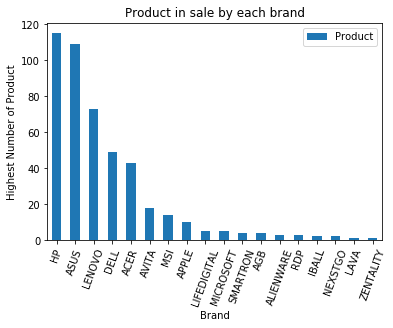

In [15]:
plt.figure(figsize=(200,100))
brandNProductCount.sort_values(by="Product",ascending=False)[["Product"]].plot.bar()
plt.title("Product in sale by each brand")
plt.xticks(rotation=70)
plt.legend()
plt.xlabel("Brand")
plt.ylabel("Highest Number of Product")
plt.show()

In [16]:
brandNCustomer=laptopByBrand.sum()
brandNCustomer.reset_index(inplace=True)
brandNCustomer=brandNCustomer[['Brand','Customer']]
brandNCustomer.set_index('Brand',inplace=True)
brandNCustomer.head()

,Customer
Brand,
ACER,14246
AGB,2088
ALIENWARE,38
APPLE,20532
ASUS,75649


<Figure size 14400x7200 with 0 Axes>

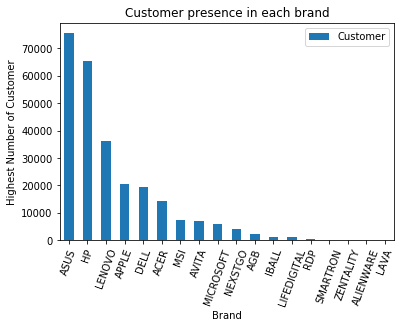

In [17]:
plt.figure(figsize=(200,100))
brandNCustomer.sort_values(by="Customer",ascending=False)[["Customer"]].plot.bar()
plt.title("Customer presence in each brand")
plt.xticks(rotation=70)
plt.xlabel("Brand")
plt.ylabel("Highest Number of Customer")
plt.show()

In [18]:
brandNRating=laptopByBrand[['Brand','Rating']]

In [19]:
brandNRating=brandNRating.agg(np.mean)
brandNRating

,Rating
Brand,
ACER,4.213953
AGB,4.325000
ALIENWARE,4.133333
APPLE,4.460000
ASUS,4.147706
AVITA,4.327778
DELL,4.055102
HP,4.233913
IBALL,4.050000


<Figure size 14400x7200 with 0 Axes>

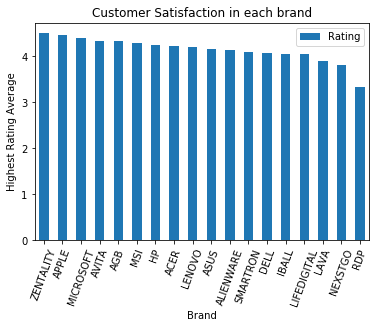

In [20]:
plt.figure(figsize=(200,100))
brandNRating.sort_values(by="Rating",ascending=False)[["Rating"]].plot.bar()
plt.title("Customer Satisfaction in each brand")
plt.xticks(rotation=70)
plt.xlabel("Brand")
plt.ylabel("Highest Rating Average")
plt.show()

In [21]:
brandNPricing=laptopByBrand[['Brand','Pricing']]

In [22]:
brandNPricing=brandNPricing.agg(np.mean)
brandNPricing

,Pricing
Brand,
ACER,62427.116279
AGB,66999.000000
ALIENWARE,299656.666667
APPLE,143081.000000
ASUS,43908.045872
AVITA,55823.333333
DELL,56017.081633
HP,47597.634783
IBALL,12990.000000


<Figure size 14400x7200 with 0 Axes>

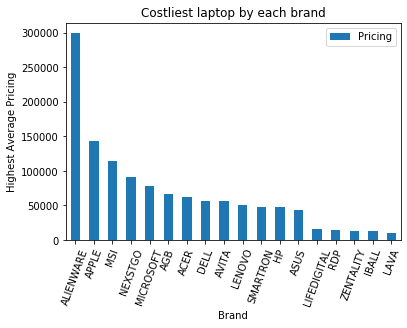

In [23]:
plt.figure(figsize=(200,100))
brandNPricing.sort_values(by="Pricing",ascending=False)[["Pricing"]].plot.bar()
plt.title("Costliest laptop by each brand")
plt.xticks(rotation=70)
plt.xlabel("Brand")
plt.ylabel("Highest Average Pricing")
plt.show()